 <font color = Red size = 5> Heart Disease Prediction using Machine Learning </font>

The rising incidence of heart disease is a major public health concern, underscoring the importance of early detection and intervention. Accurately and efficiently diagnosing heart disease is a challenging task, as it involves numerous risk factors, such as cholesterol levels, smoking habits, obesity, family history, blood pressure, and working conditions.

Thankfully, advances in machine learning algorithms have made it possible to develop predictive models that can help healthcare professionals identify individuals at risk of heart disease. By using regression models or the KNN method, machine learning algorithms can analyze large datasets of patient information and generate accurate predictions.

Developing these models can have a significant impact on public health, potentially saving tens of thousands of lives in the future. Being a part of such a critical endeavor is a humbling and inspiring experience, as it highlights the immense potential of machine learning to improve human health and well-being.


<img src="heart.jpg" alt="heart image" />

## The goal
Using machine learning to classify cardiovascular disease occurrence can help diagnosticians reduce misdiagnosis. This research develops a model that can correctly predict cardiovascular diseases to reduce the fatality caused by cardiovascular diseases.
## Importing libraries

In [20]:
# To remove unwanted warnings in GridSearchCV
import warnings
warnings.filterwarnings('ignore') 
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Preparing and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
import os
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from pickle import dump
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

%matplotlib inline
sns.set_style('darkgrid')

### Step 1: Reading and Understanding the Data


1. Importing data using the pandas library
2. Understanding the structure of the data

In [5]:
heart = pd.read_csv("heart.csv")
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


 # EDA

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
heart.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
# statistical measures about the data
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart.shape

(1025, 14)

In [10]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Visualizing the data
Check relation between features and target

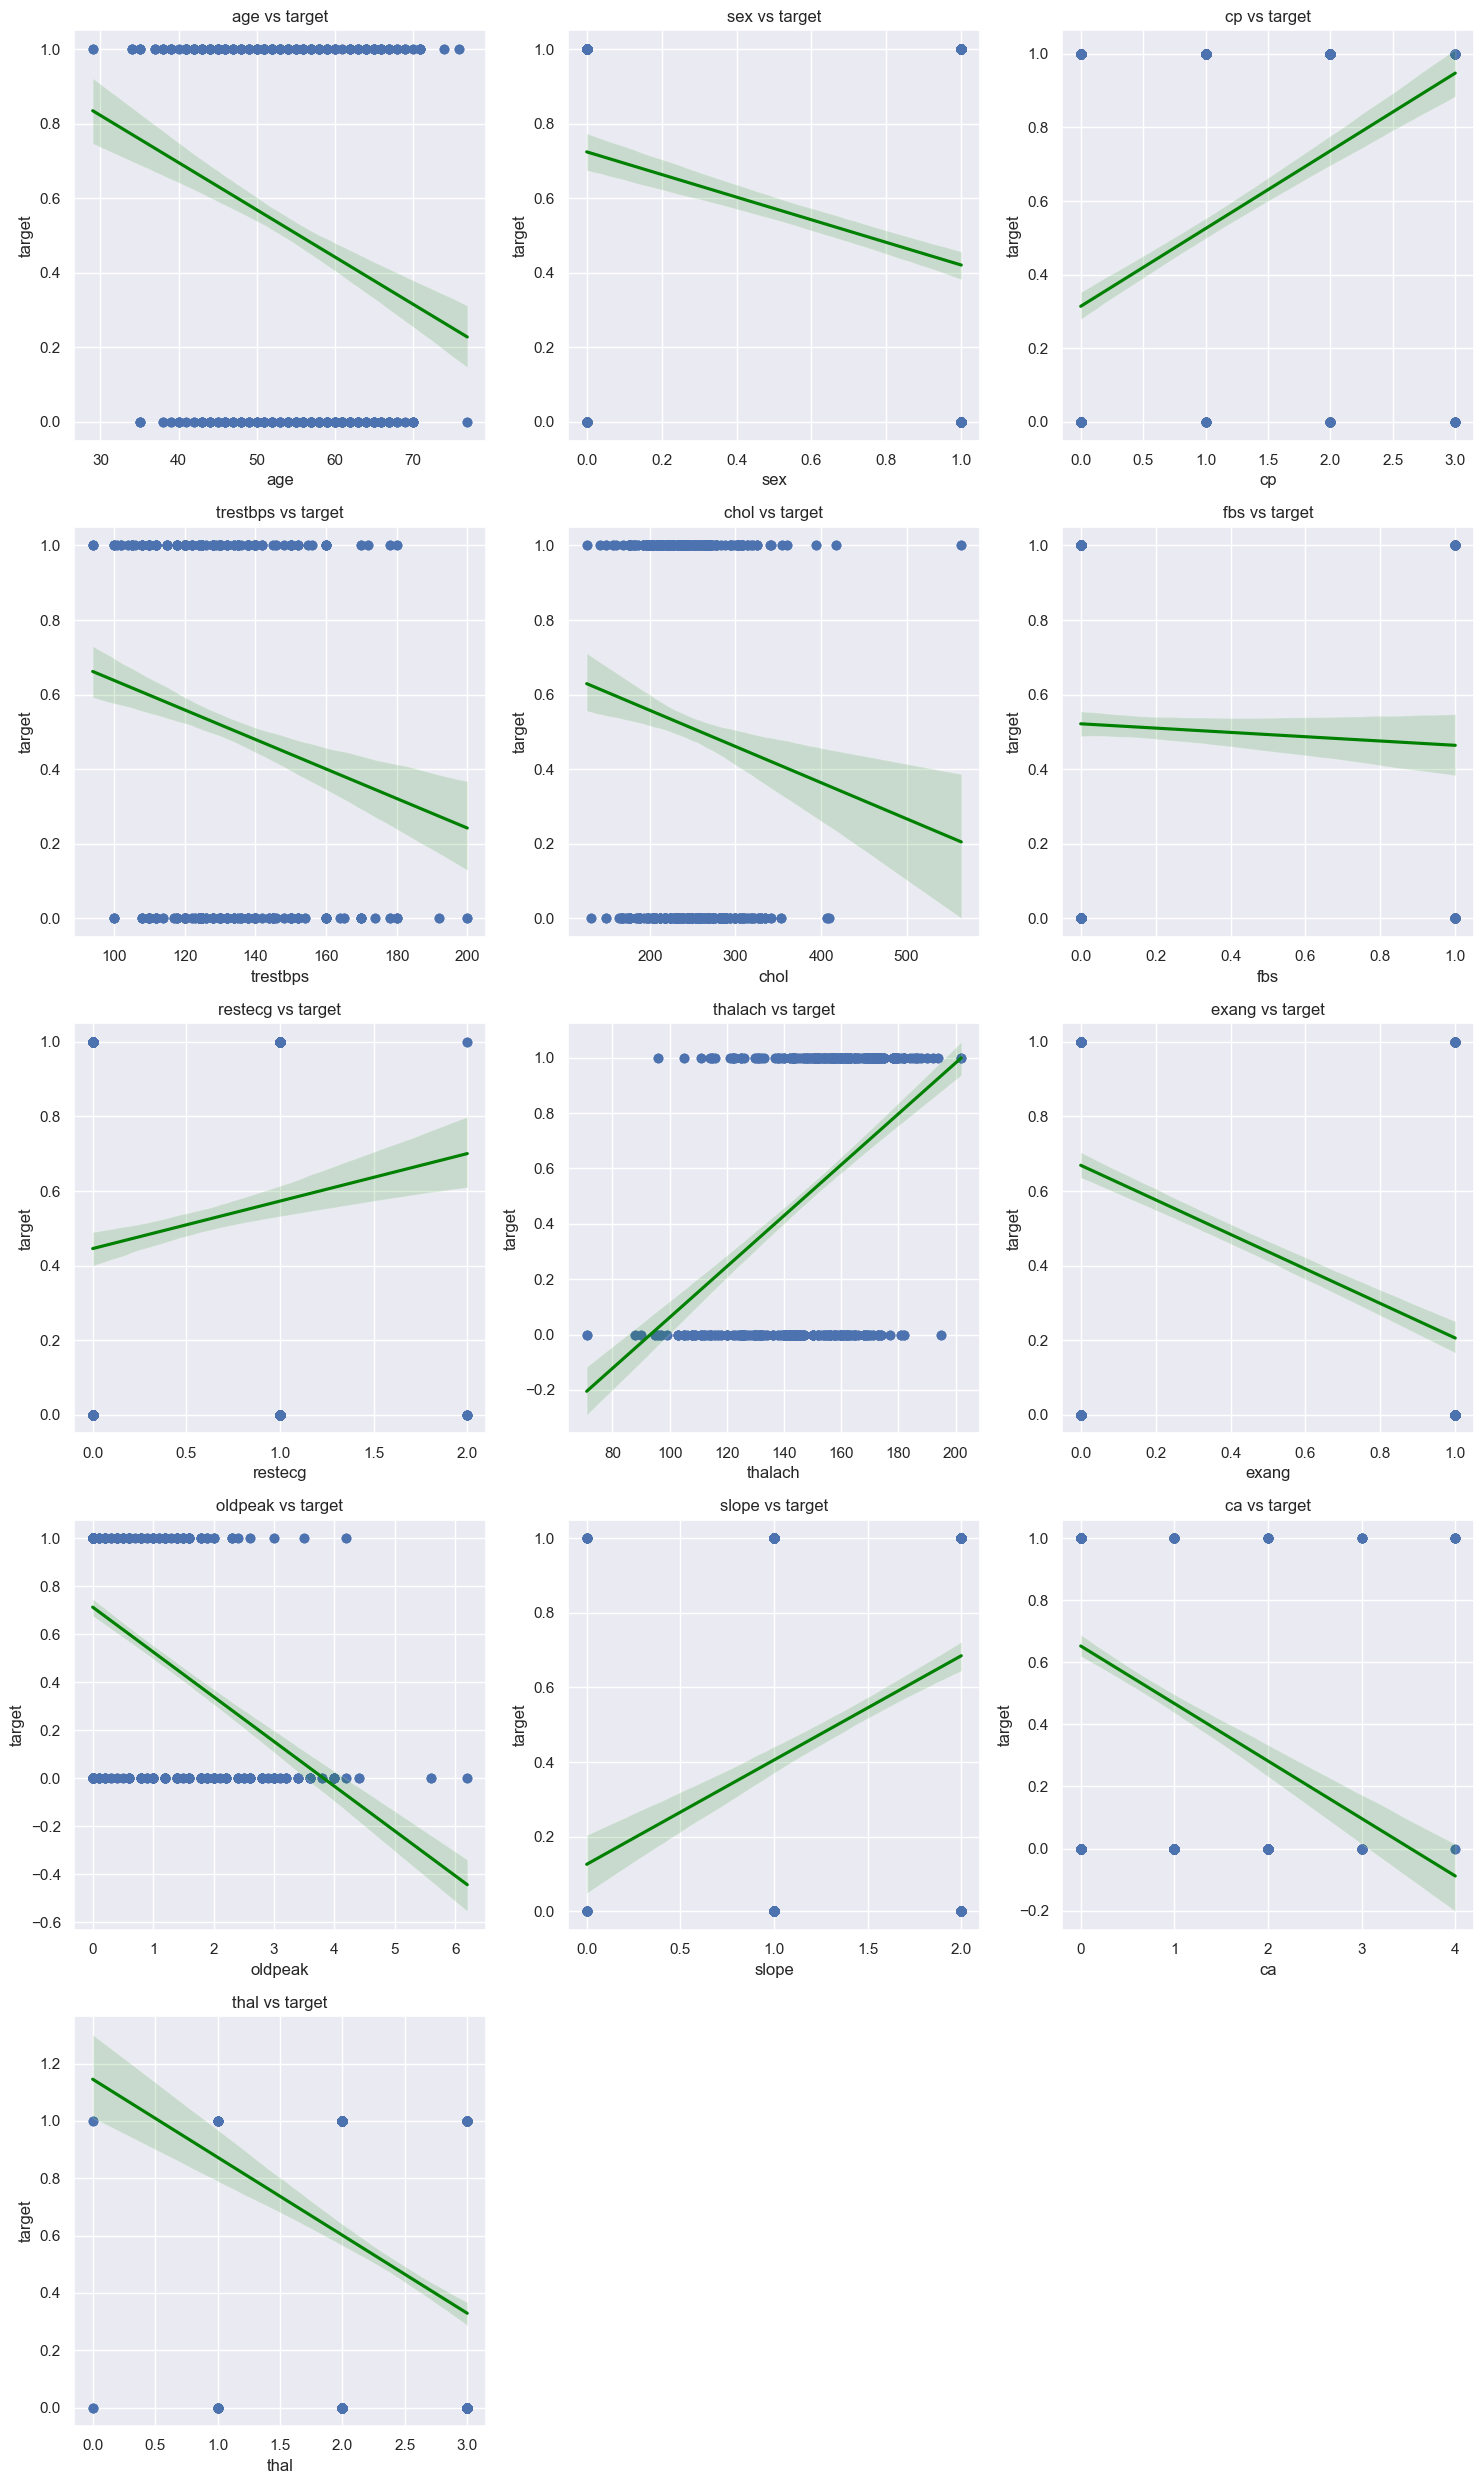

In [21]:
x_vars = ["age", "sex", "cp","trestbps", "chol", "fbs","restecg", "thalach", "exang","oldpeak", "slope", "ca","thal"]
y_var = "target"

num_cols = 3
num_rows = math.ceil(len(x_vars) / num_cols)

# Create a figure with custom size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Create pairplots for each group of variables and place them in the subplots
for i, x_var in enumerate(x_vars):
    row = i // num_cols
    col = i % num_cols
    
    sns.regplot(data=heart, x=x_var, y=y_var, ax=axes[row, col], line_kws={'color': 'green'})
    axes[row, col].set_title(f"{x_var} vs {y_var}")

# Remove any empty subplots
for i in range(len(x_vars), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust spacing
plt.tight_layout()


plt.show()

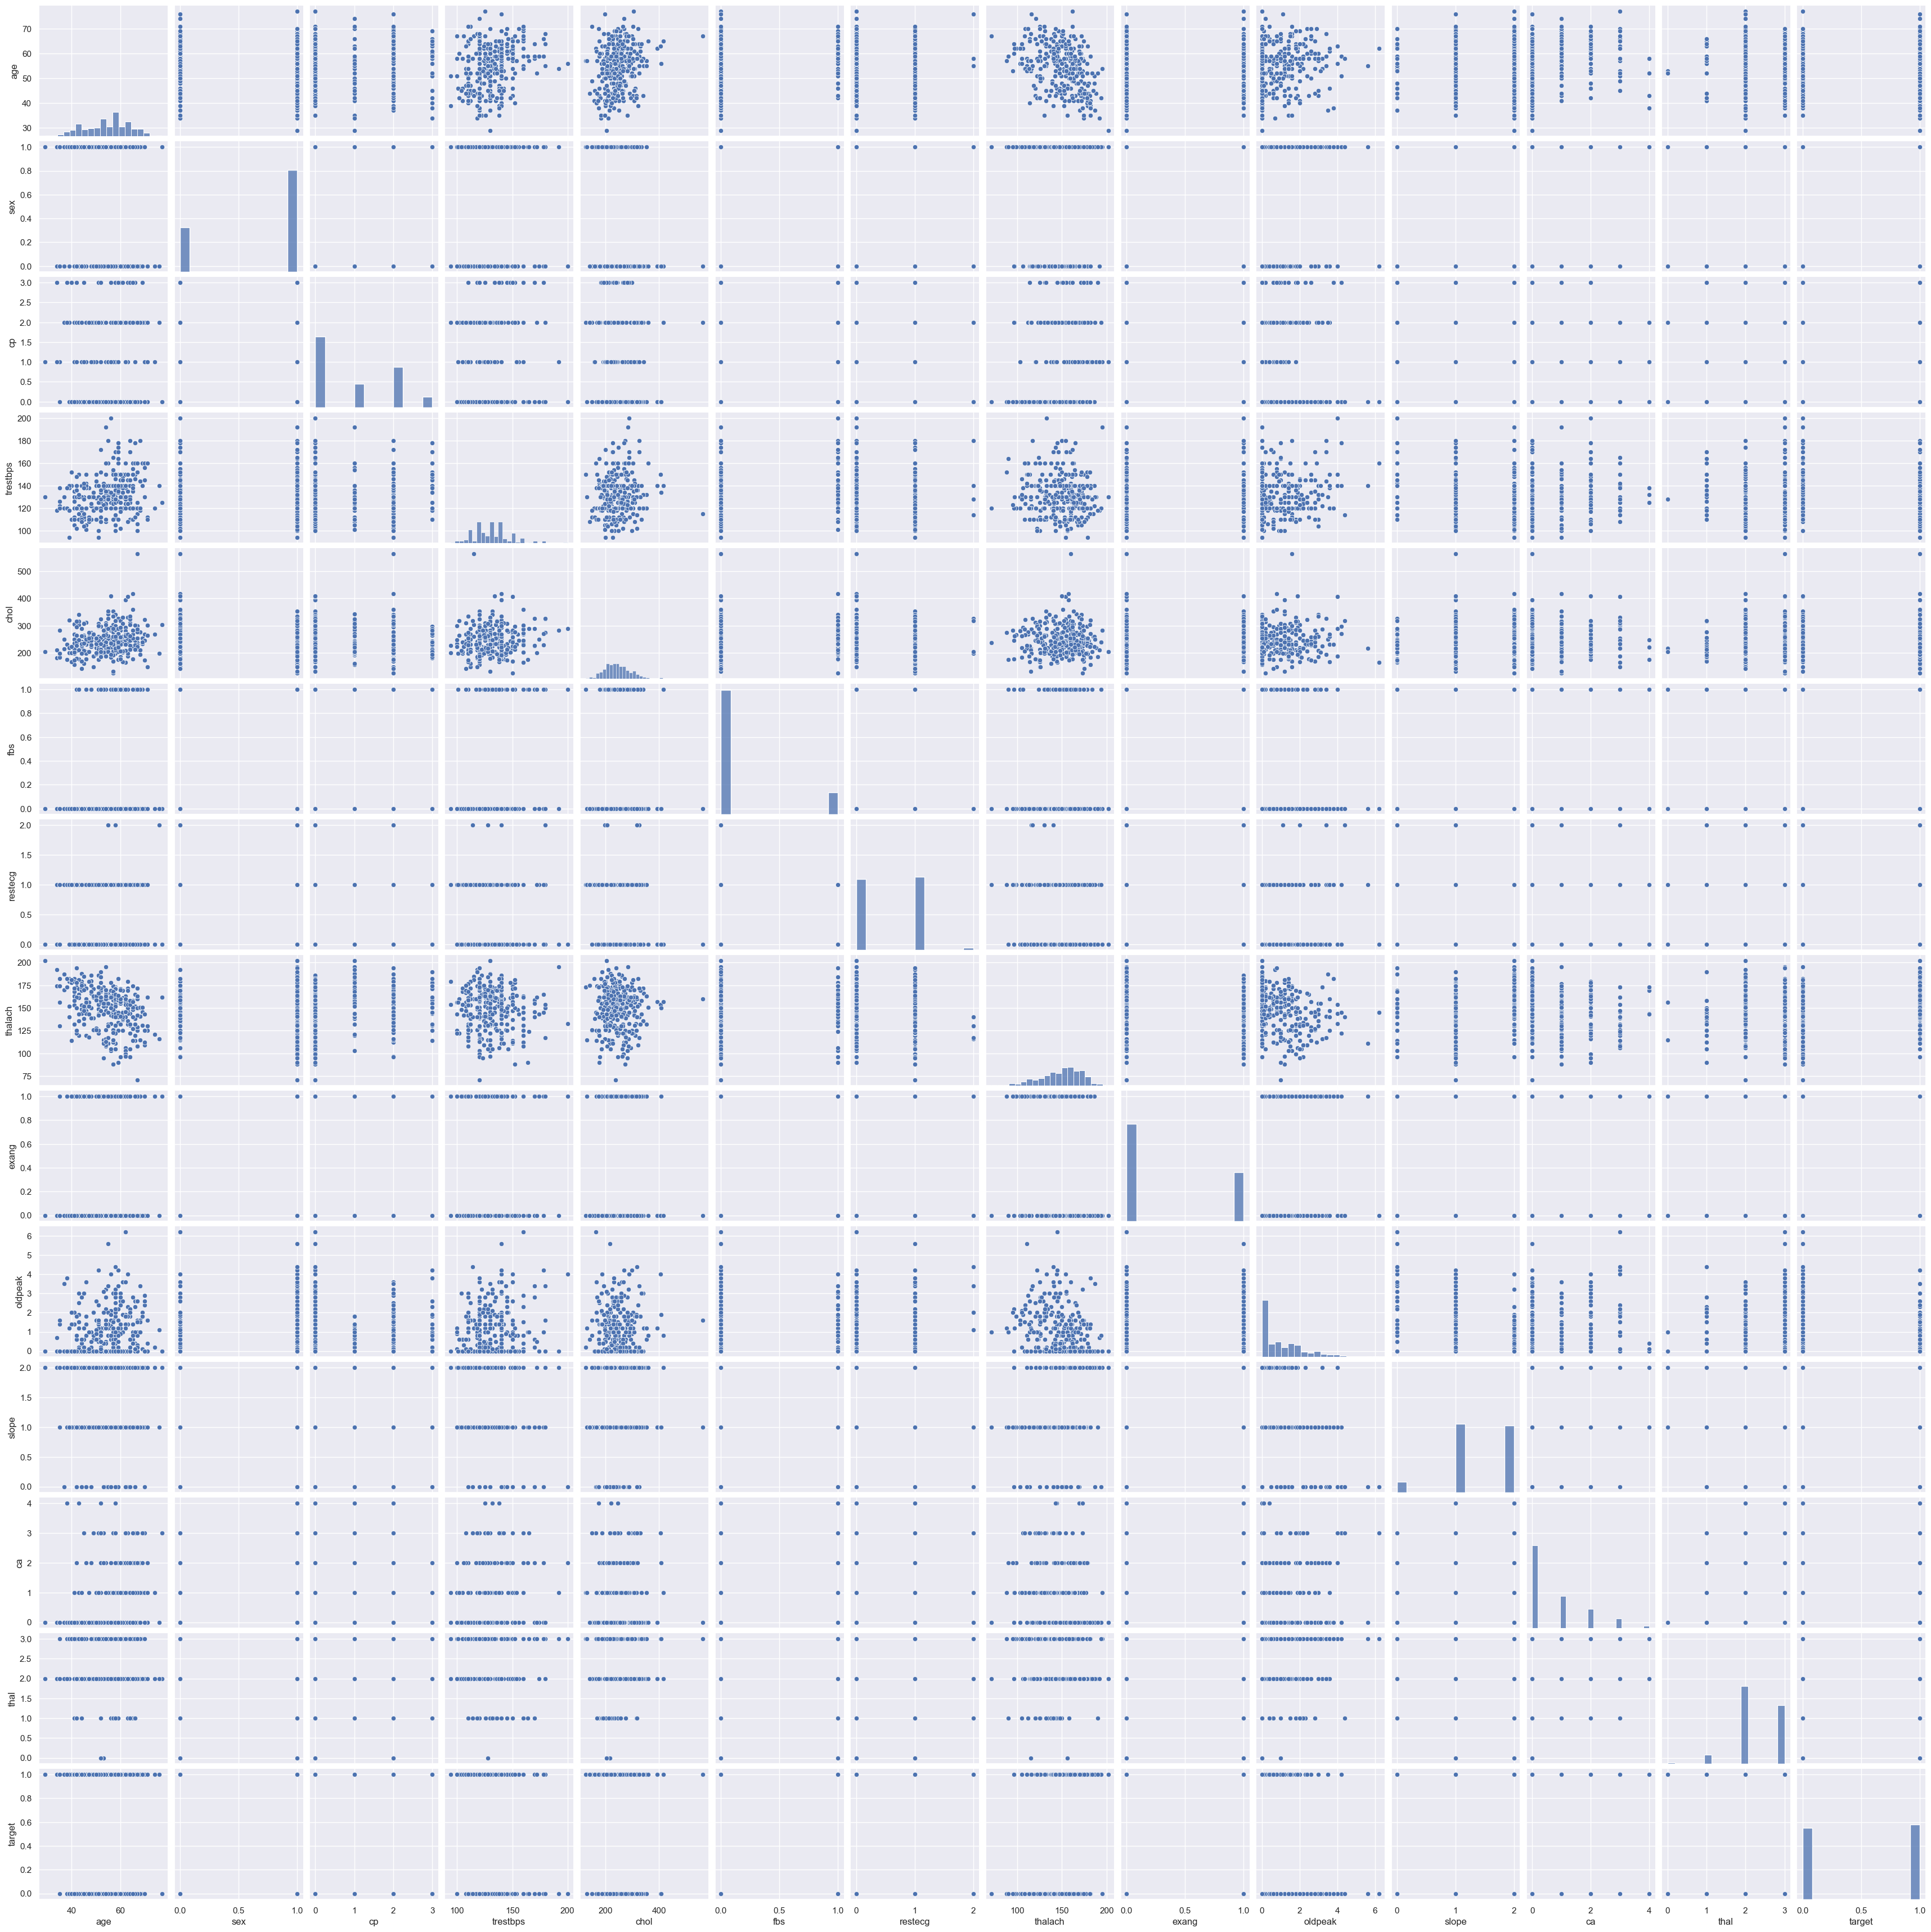

In [26]:
sns.pairplot(heart)

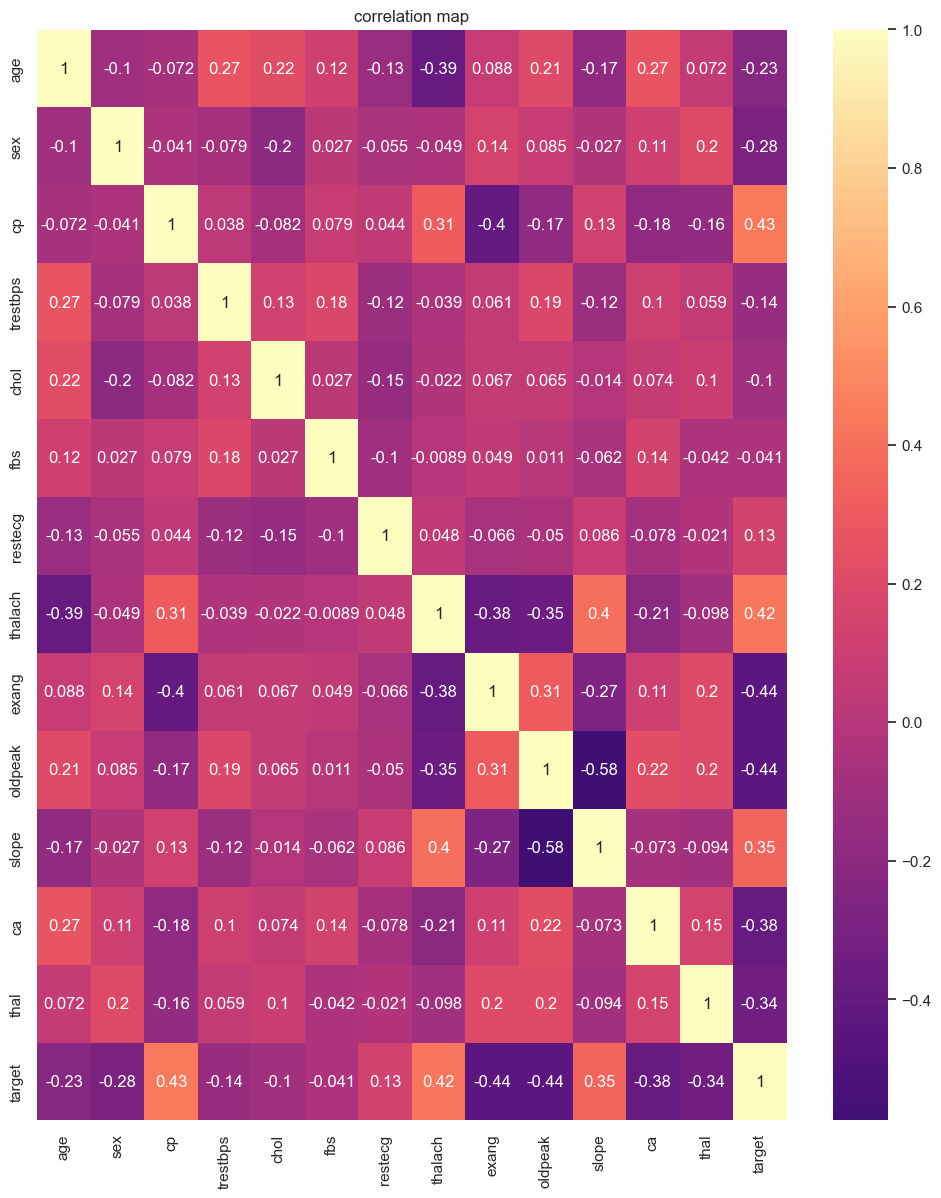

In [30]:
matrix=heart.corr()
plt.figure(figsize=(10, 12))
sns.heatmap(matrix, annot=True, cmap='magma',center=0);
plt.tight_layout()
plt.title("correlation map")
plt.show()


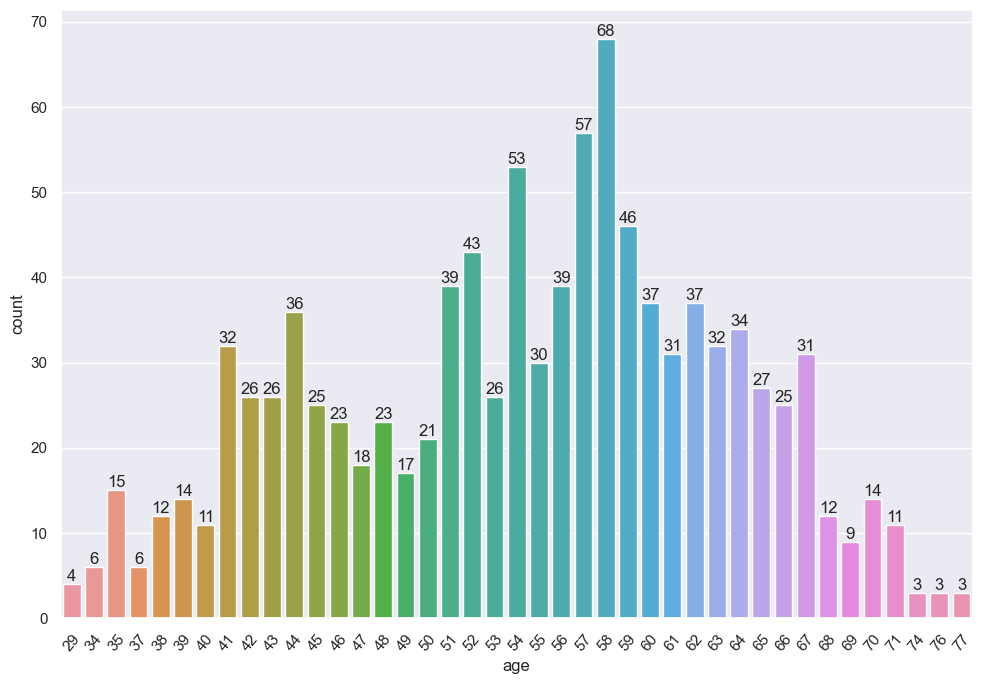

In [31]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
plt.xticks(rotation=50)
bar = sns.countplot(data=heart, x='age')
for c in bar.containers:
    plt.bar_label(container=c, label_type='edge')
plt.tight_layout()

We get a countplot of the "age" column with rotated x-axis labels, and each bar  have a label showing the count of occurrences of that age value. 

In [32]:
age_bps = pd.DataFrame({
    'The average of the resting blood pressure amount' : heart.groupby('age')['trestbps'].mean(numeric_only=True),
    'Age' : sorted(heart['age'].unique())
})
px.bar(age_bps, 'Age', 'The average of the resting blood pressure amount', color='Age')

This code  creating a bar chart where each bar represents the average resting blood pressure for a specific age, and the bars are colored by age.

In [33]:
age_chol = pd.DataFrame({
    'The average of the cholestoral amount (mg/dl)' : heart.groupby('age')['chol'].mean(numeric_only=True),
    'Age' : sorted(heart['age'].unique())
})
px.bar(age_chol, 'Age', 'The average of the cholestoral amount (mg/dl)', color='Age')

The average cholesterol levels for different age groups, with bars colored by age.

In [34]:
age_nv = pd.DataFrame({
    'The number of major vessels' : heart.groupby('age')['ca'].count(),
    'Age' : sorted(heart['age'].unique())
})
px.bar(age_nv, 'Age', 'The number of major vessels', color='Age')

The number of major vessels for different age groups, with bars colored by age.

In [35]:
heartD_cp = pd.DataFrame({
    'The situation of clinets (0-1)' : heart.groupby('cp')['target'].mean(),
    'The chest pain type' : sorted(heart['cp'].unique())
})
px.histogram(heartD_cp, 'The chest pain type', 'The situation of clinets (0-1)',
             color='The chest pain type', barmode='overlay', nbins=4)

This histogram displaying the distribution of "The situation of clients (0-1)" for each chest pain type, with the histograms overlaid and colored by chest pain type.

In [36]:
heartD_maxRate = pd.DataFrame({
    'The situation of clinets (0-1)' : heart.groupby('thalach')['target'].mean(),
    'The maximum heart rate achieved' : sorted(heart['thalach'].unique())
})
px.bar(heartD_maxRate, 'The maximum heart rate achieved', 'The situation of clinets (0-1)',
             color='The maximum heart rate achieved')

This bar chart display the relationship between the maximum heart rate achieved and the situation of clients, with bars colored by the maximum heart rate achieved.

In [37]:
heartD_slope = pd.DataFrame({
    'The situation of clinets (0-1)' : heart.groupby('slope')['target'].mean(),
    'The slope of the peak exercise' : sorted(heart['slope'].unique())
})
px.histogram(heartD_slope, 'The slope of the peak exercise', 'The situation of clinets (0-1)',
             color='The slope of the peak exercise', nbins=3)

A histogram displaying the distribution of "The situation of clients (0-1)" for each slope of the peak exercise, with the histogram bars colored by the slope of the peak exercise.

<Axes: xlabel='target', ylabel='count'>

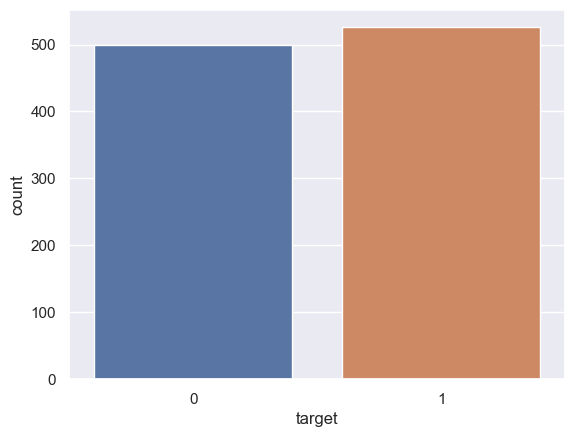

In [38]:
sns.countplot(data=heart, x='target')

## Data Scaling

In [12]:
# checking the distribution of Target Variable
heart['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

### Splitting the Features and Target

In [13]:
X = heart.drop(columns='target', axis=1)
Y = heart['target']

In [14]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [15]:
#Splitting Data into Training data & Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)
